<a href="https://colab.research.google.com/github/FabioHenriqueJ/An-lise-Merc-games/blob/main/Proj_MercadoGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conjunto de dados sobre o mercado de game

In [7]:
# Importando bibliotecas
# Para modelagem e Matrizes
import numpy as np
import pandas as pd

# Para análises Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
# Para ignorar avisos
import warnings
# Desabilitando avisos
warnings.filterwarnings('ignore')

In [8]:
Base_Dados = pd.read_csv('PS4_GamesSales.csv', encoding= 'latin-1')
Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [9]:
# Dimensão
Base_Dados.shape

(1034, 9)

In [10]:
# Campos nulos
Base_Dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

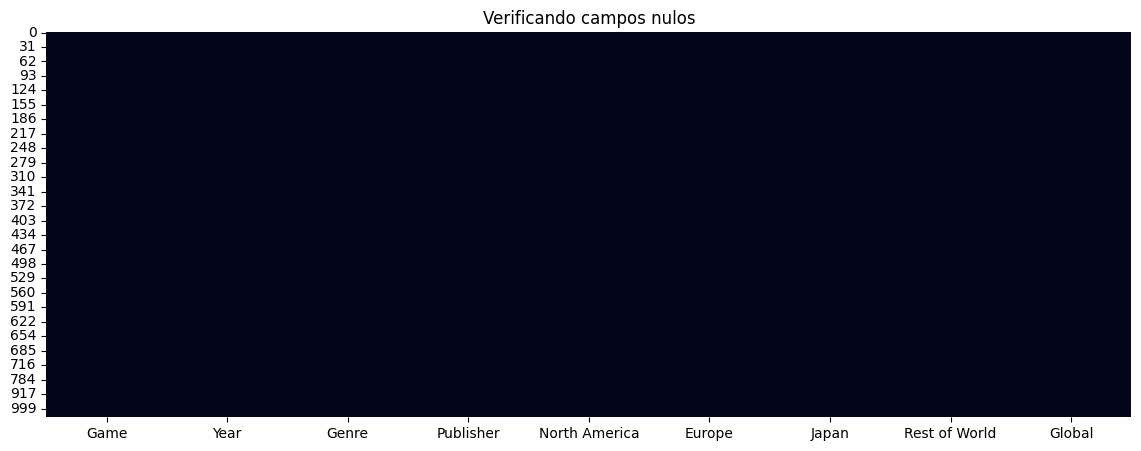

In [13]:
# Nulos graficos
plt.figure( figsize=(14,5))
plt.title('Verificando campos nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False);


In [12]:
# Retirando Valores nulos
Base_Dados.dropna(inplace=True)

In [14]:
Base_Dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


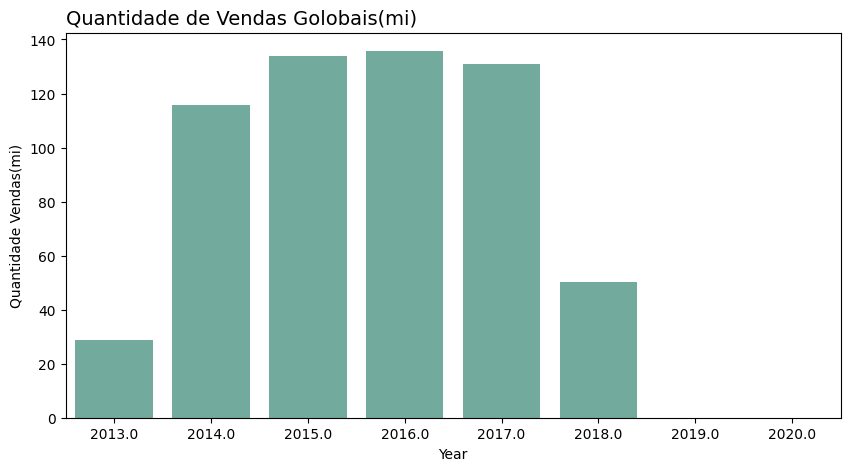

In [17]:
# Tamanho da imagem
plt.figure(figsize=(10,5))
# Titulo
plt.title('Quantidade de Vendas Golobais(mi)',loc='left', fontsize=14)
# Grafico
sns.barplot(data=Base_Dados, x='Year', y='Global', ci=None, color='#69b3a2',estimator=sum)
# Label
plt.ylabel('Quantidade Vendas(mi)'); 

In [16]:
# Retirada dos Anos 
Base_Dados.loc[(Base_Dados['Year']!=2019) & (Base_Dados['Year']!=2020 )]['Year'].unique()

array([2014., 2015., 2018., 2017., 2016., 2013.])

In [18]:
Base_Dados = Base_Dados.loc[(Base_Dados['Year']!=2019) & (Base_Dados['Year']!=2020 )]
Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


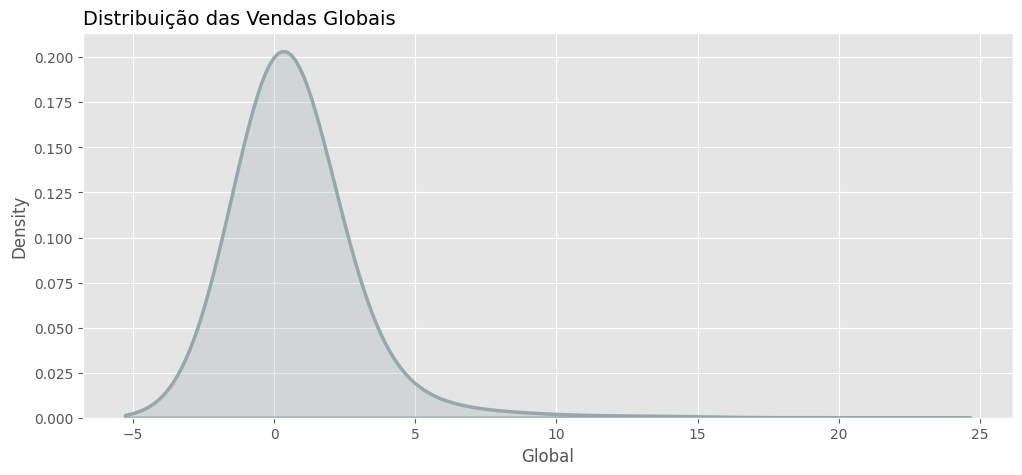

In [24]:
# Tamanho
plt.figure (figsize=(12, 5))
# estilo
plt.style.use('ggplot')
#sns.kdeplot(Base_Dados['Global'])
# Titulo
plt.title('Distribuição das Vendas Globais', loc= 'left', fontsize=14)
# plot
sns.kdeplot( Base_Dados['Global'], shade= True, bw=1, color='#96a8a8', linewidth=2.5);

In [20]:
Base_Dados.groupby( by= ['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


<Axes: title={'center': 'Analise da distribuição(mi)'}, xlabel='Year', ylabel='Global'>

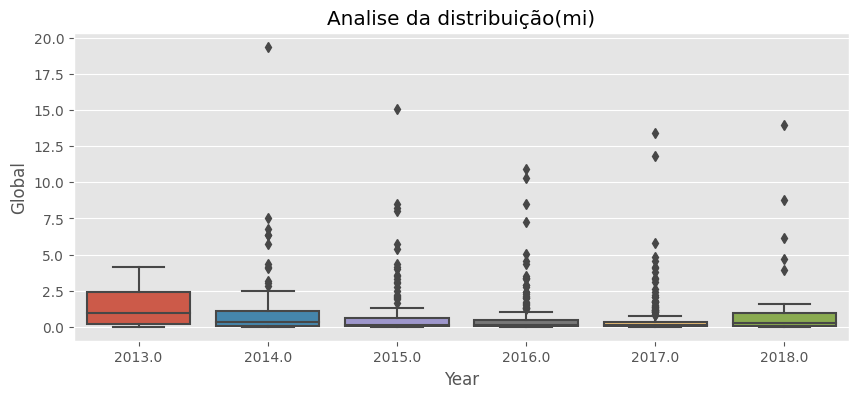

In [49]:
# Tamanho
plt.figure( figsize=(10,4))
# titulo
plt.title('Analise da distribuição(mi)')
# plot
sns.boxplot(data=Base_Dados, x='Year', y= 'Global')

In [50]:
Base_Dados.loc[ Base_Dados['Global']>=10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [46]:
Base_Dados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [47]:
Analise 

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


In [51]:
America = [America / Total * 100 for America, Total in zip( Analise['North America'], Analise ['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip( Analise['Europe'], Analise ['Global'])]
Japao = [Japao / Total * 100 for Japao, Total in zip( Analise['Japan'], Analise ['Global'])]
Mundo = [Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise ['Global'])]
America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])